In [117]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [118]:
df = pd.read_csv('./economic_index.csv')

In [119]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [120]:
df.isna().sum()

,0
Unnamed: 0,0
year,0
month,0
interest_rate,0
unemployment_rate,0
index_price,0


In [121]:
# drop unrelevant columns
df.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)

In [122]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


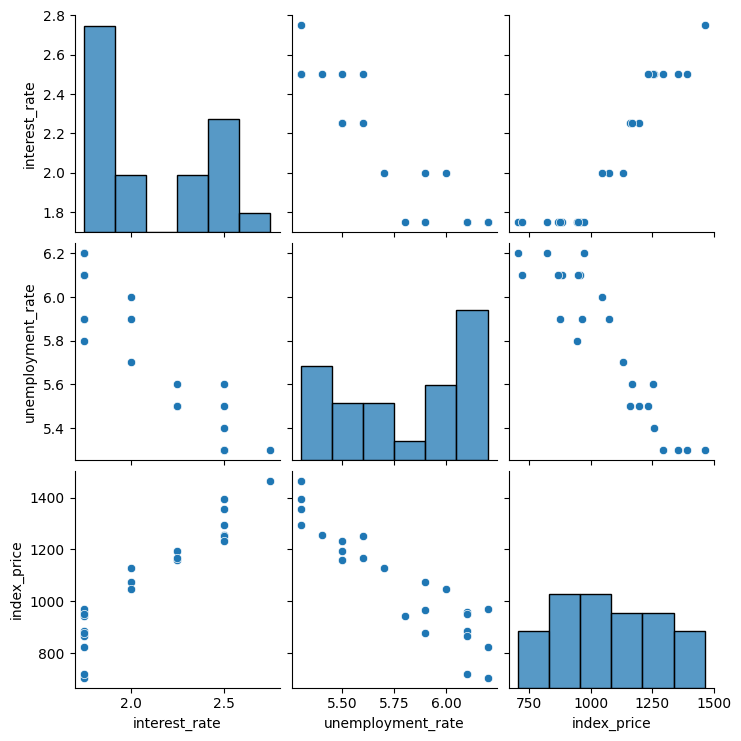

In [123]:
sns.pairplot(df)

In [124]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [125]:
# Independent and dependen features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [126]:
print(X.head())
print(y.head())

   interest_rate  unemployment_rate
0           2.75                5.3
1           2.50                5.3
2           2.50                5.3
3           2.50                5.3
4           2.50                5.4
0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64


In [127]:
# tran test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

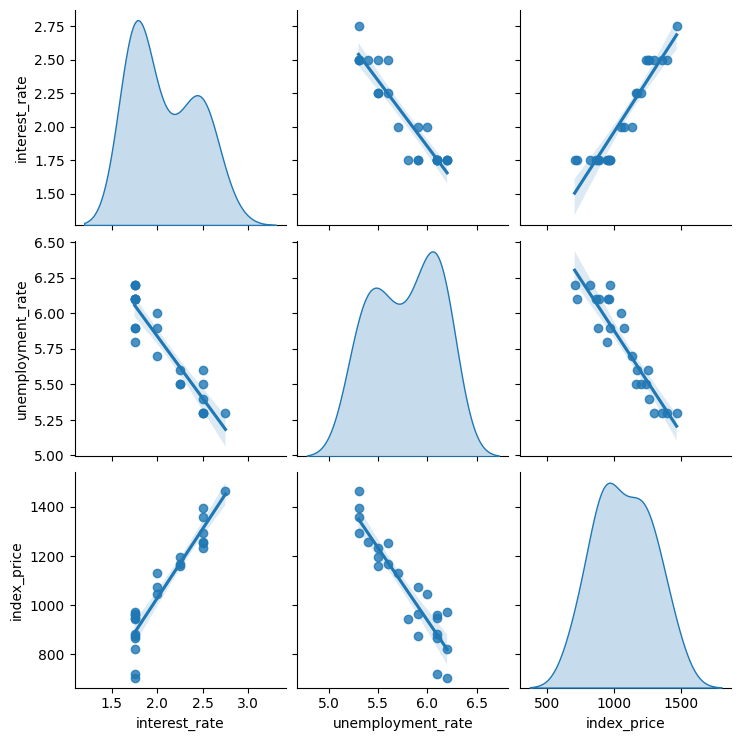

In [128]:
sns.pairplot(df, kind='reg', diag_kind='kde')

In [129]:
from sklearn.preprocessing import StandardScaler

In [130]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [131]:
from sklearn.linear_model import LinearRegression

In [132]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [133]:
from sklearn.model_selection import cross_val_score

In [134]:
# Cross Validation
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [135]:
print(validation_score)
np.mean(validation_score)

[-4921.61331265 -7686.87497294 -5135.9962549 ]


np.float64(-5914.828180162386)

In [136]:
# prediction
y_pred = regression.predict(X_test)

In [137]:
# Performance metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
r2 = r2_score(y_pred, y_test)
print("R2 Score: ", r2)
adjusted_r2 = 1 - ((1 - r2)*(len(y_test) - 1))/(len(y_test) - (len(df.columns) -1) - 1) # adjusted r2 score = 1 - ((1 - r2)*(N - 1))/(N - k - 1)
print("Adjust R2: ", adjusted_r2)
mse = mean_squared_error(y_pred, y_test)
print("MSE: ", mse)
mae = mean_absolute_error(y_pred, y_test)
print("MAE: ", mae)
rmse = root_mean_squared_error(y_pred, y_test)
print("RMSE: ", rmse)

R2 Score:  0.8626502528670701
Adjust R2:  0.7710837547784501
MSE:  5793.762887712569
MAE:  59.935781523235484
RMSE:  76.11677139574805


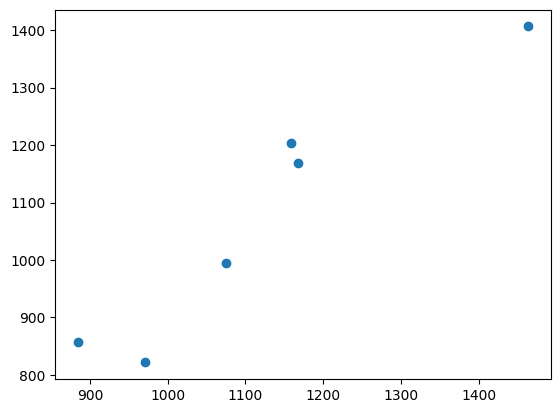

In [138]:
# Assumptions
plt.scatter(y_test, y_pred)


In [139]:
print(y_pred, "\n", np.array(y_test))

[1204.22770398  821.65051903 1406.51300368  857.70889608  994.90992298
 1168.16932693] 
 [1159  971 1464  884 1075 1167]


In [140]:
residuals=y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


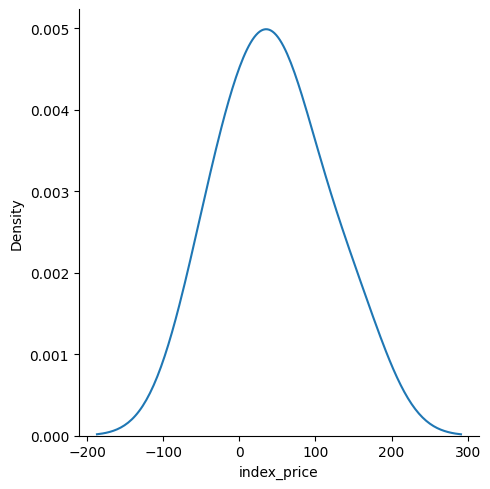

In [141]:
sns.displot(residuals, kind='kde')

In [142]:
# Compute the results using OLS
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 18 Oct 2025   Prob (F-statistic):                       0.754
Time:                        06:36:14   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
regression.coef_

array([  88.27275507, -116.25716066])